# **Palmer Penguins Dataset Analysis**     
This notebook contains analysis of the Palmer Penguins dataset.   
Information about the dataset can be found [here](https://github.com/PaulShox/poda-mywork#about-the-dataset)

## **1. Setting up the Data**

***

#### **1.1 Importing Libraries**
- Pandas is a Python Library used for cleaning, analyzing and manipulating data. More information can be found [here](https://pandas.pydata.org/docs/)
- NumPy is a Python Library for working with arrays, linear algebra, and matrices. More information can be found [here](https://numpy.org/)
- Matplotlib is a comprehensive Python library for creating static, animated, and interactive visualizations in Python. More information can be found [here](https://matplotlib.org/)
- Seaborn is a Python data visualization library based on matplotlib. More information can be found [here](https://seaborn.pydata.org/)   
- Warnings is used to suppress unnecessary warnings. More infomration can be found [here](https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings)


In [1]:
# Import Warnings
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

# Import Pandas    
import pandas as pd 

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Numpy
import numpy as np

#Import Seaborn
import seaborn as sns
from seaborn import pairplot

#### **1.2 Loading the Data**   
- The Palmer Penguins dataset, which is a csv file, is loaded using Pandas *read_csv* functionality. The dataset can be found [here](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins.csv).
- The variable *peng* is assigned to the dataset for ease of use when writing Python code.

In [2]:
# Load the penguins dataset
peng = pd.read_csv('penguins.csv')

#### **1.3 Checking the Data has loaded**  
- Running the variable *peng* will return a view of all the columns as well as some of the values.
- It will also summarise the amount of rows and columns.   

In [3]:
# Check that the data has loaded
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## **2. Overview of Dataset**

***

### **2.1 The following is a brief summary of the dataset:**
- A total of 344 penguins were analyzed.
- Males and females from three species of penguins were analyzed.
- There are 8 different variables used in the analysis.
- The penguins were analyzed from three islands in the Palmer Archipelego in the Antartic.
- The analysis was conducted over three years.

### **2.2 Variables and Variable Types:**

- As mentioned previously, eight variables were used to analyze the penguins. Those variables, and the variable (data) types, are below:

In [4]:
# List the column names, i.e. variables, and each variable (data) type
peng.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

- In Python, there are four main data types - more information [here](https://realpython.com/python-data-types/):
    1.  String. A series of characters. Referred to as 'str' in Python, 'object' in a pandas dataframe.
    2.  Integer. Whole numbers. Referred to as 'int' in Python, 'int64' in a pandas dataframe.
    3.  Float. A decimal point number. Referred to as 'float' in Python, 'float64' in a pandas dataframe.
    4.  Boolean. A True or False value. Referred to as 'bool' in both Python and pandas dataframe.

- Per the penguins dataset:   
    - species, island and sex are classified as object (i.e. string),
    - bill length, bill depth, flipper length and body mass are classified as float64 (i.e. float),
    - year is classified as int64 (i.e., int).

- The variable type classifications seem appropriate.    
    - Any numerical calculations will only be done on the bill length, bill depth, flipper length, and body mass so the float classification is fine.
    - The int classification for year is also fine

## **3. Initial Exploratory Analysis**   

***

### **3.1 Check for any missing data:**

In [5]:
# Check if there is any missing data from the dataset
peng.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
# Return rows with missing data
missing = peng[peng.isna().any(axis=1)]
missing

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


##### As can be seen from the above, there is very little missing data; 2 values are missing from four of the Columns, and 11 values are missing from the sex column.    
##### In order not to skew any further analysis, those 11 rows can be removed:

In [7]:
# Remove rows with missing values
peng.dropna(inplace=True)

##### Check there are no remaining missing values:

In [8]:
# Check for missing values
peng.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

#### Now that there is no missing data, let's look at some initial analysis of the data:

### **3.2 How many penguins of each species are there?**

In [9]:
# Count number of each species
peng['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

### **3.3 How many penguins of each sex are there?**

In [10]:
# Count number of each sex (this won't add up to the row amount of 344 as 11 values were missing)
peng['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

### **3.4 What is the breakdown of sex in each species?**

In [11]:
# Number of males and females per species
peng.groupby('species').sex.value_counts()

species    sex   
Adelie     female    73
           male      73
Chinstrap  female    34
           male      34
Gentoo     male      61
           female    58
Name: count, dtype: int64

### **3.5 How many penguins are on each island?**

In [12]:
# Number of penguins on each island
peng['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

### **3.6 What species of penguin, and how many of each, are on each island?**

In [13]:
# Penguin species per island
peng.groupby('island').species.value_counts()

island     species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: count, dtype: int64

### **3.7 What is the average body mass, bill length, bill depth and flipper length per species and per sex?**

In [14]:
# Group species and sexes by measurement variables
avg3 = peng.groupby(
            ['species', 'sex']
            )[['body_mass_g', 
               'bill_length_mm', 
               'bill_depth_mm', 
               'flipper_length_mm']]

# Get the mean of each each sex per species, sort and round
round(avg3.mean().sort_values('species'))

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       3369.0            37.0           18.0   
          male         4043.0            40.0           19.0   
Chinstrap female       3527.0            47.0           18.0   
          male         3939.0            51.0           19.0   
Gentoo    female       4680.0            46.0           14.0   
          male         5485.0            49.0           16.0   

                  flipper_length_mm  
species   sex                        
Adelie    female              188.0  
          male                192.0  
Chinstrap female              192.0  
          male                200.0  
Gentoo    female              213.0  
          male                222.0

##### ***What is the standard deviation of each of the above?***

In [15]:
# Standard Deviation of variables
sd1 = peng.groupby(['species', 'sex'])[
                    ['body_mass_g', 
                     'bill_length_mm', 
                     'bill_depth_mm', 
                     'flipper_length_mm']
                     ].std().sort_values('species')
round(sd1, 2)

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       269.38            2.03           0.94   
          male         346.81            2.28           1.02   
Chinstrap female       285.33            3.11           0.78   
          male         362.14            1.56           0.76   
Gentoo    female       281.58            2.05           0.54   
          male         313.16            2.72           0.74   

                  flipper_length_mm  
species   sex                        
Adelie    female               5.60  
          male                 6.60  
Chinstrap female               5.75  
          male                 5.98  
Gentoo    female               3.90  
          male                 5.67

## **4. Visualization Analysis**  

***

- In this section, Histograms will be used to illustrate the distributions of the four measurement variables in the dataset.   
- Bar Plots will be used to illustrate comparisons of the averages of the four measurement variables in the dataset for all species, and then a second barplot will illustrate the averages of the Adelie species across the three islands.

### **4.1 Histograms**   
Histograms can be used to plot the distributions of the measurement variables in the dataset.
Seaborn's histplot functionality will be used. More information on Seaborn histplot can be found [here](https://seaborn.pydata.org/generated/seaborn.histplot.html)

#### ***4.1.1 Body Mass Distributions***

[Text(0.5, 1.0, 'Body Mass - Per Sex')]

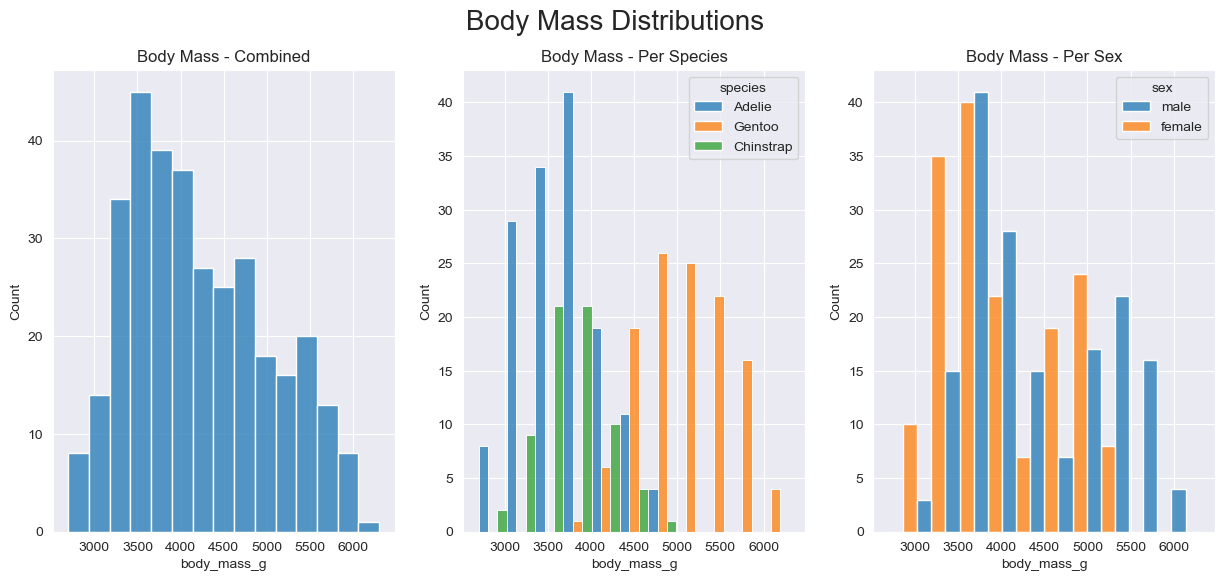

In [64]:
# Setup the structure of the figure and number of axes.
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Body Mass Distributions', fontsize=20)

# Setup the variables to be plotted, analysed in each axes.
sns.histplot(ax=axes[0], data=peng, x='body_mass_g', bins=15).set(title='Body Mass - Combined')
sns.histplot(ax=axes[1], data=peng, x='body_mass_g', hue='species', multiple='dodge').set(title='Body Mass - Per Species')
sns.histplot(ax=axes[2], data=peng, x='body_mass_g', hue='sex', multiple='dodge').set(title='Body Mass - Per Sex')



#### ***4.1.2 Bill Length Distributions***

[Text(0.5, 1.0, 'Bill Lengths - Per Sex')]

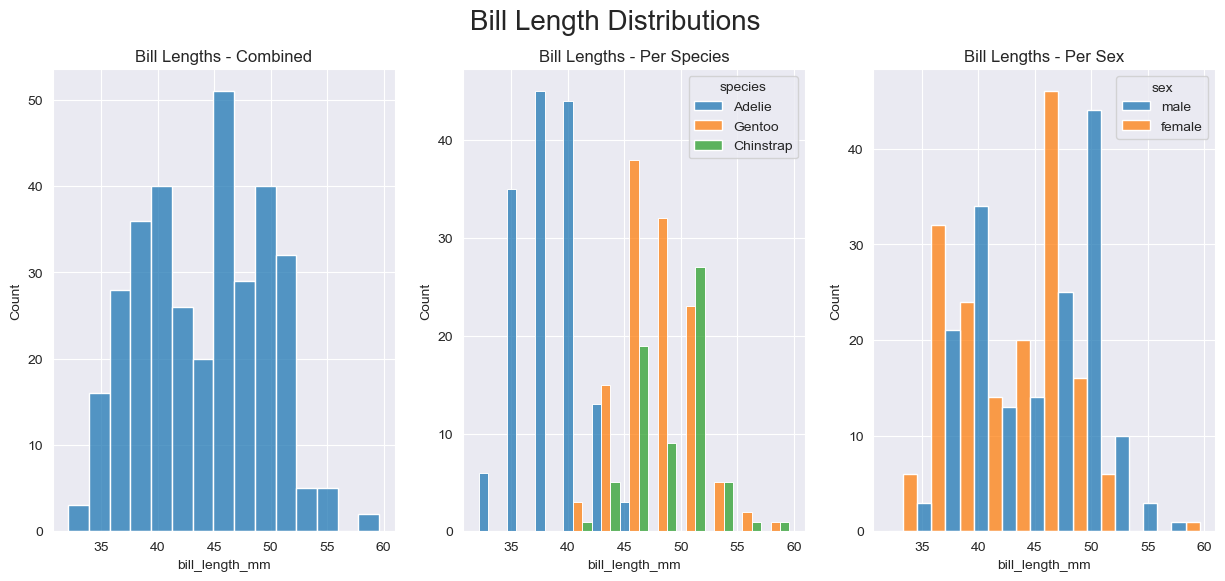

In [63]:
# Setup the structure of the figure and number of axes.
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Bill Length Distributions', fontsize=20)

# Setup the variables to be plotted, analysed in each axes.
sns.histplot(ax=axes[0], data=peng, x='bill_length_mm', bins=15).set(title='Bill Lengths - Combined')
sns.histplot(ax=axes[1], data=peng, x='bill_length_mm', hue='species', multiple='dodge').set(title='Bill Lengths - Per Species')
sns.histplot(ax=axes[2], data=peng, x='bill_length_mm', hue='sex', multiple='dodge').set(title='Bill Lengths - Per Sex')

#### ***4.1.3 Bill Depth Distributions***

[Text(0.5, 1.0, 'Bill Depths - Per Sex')]

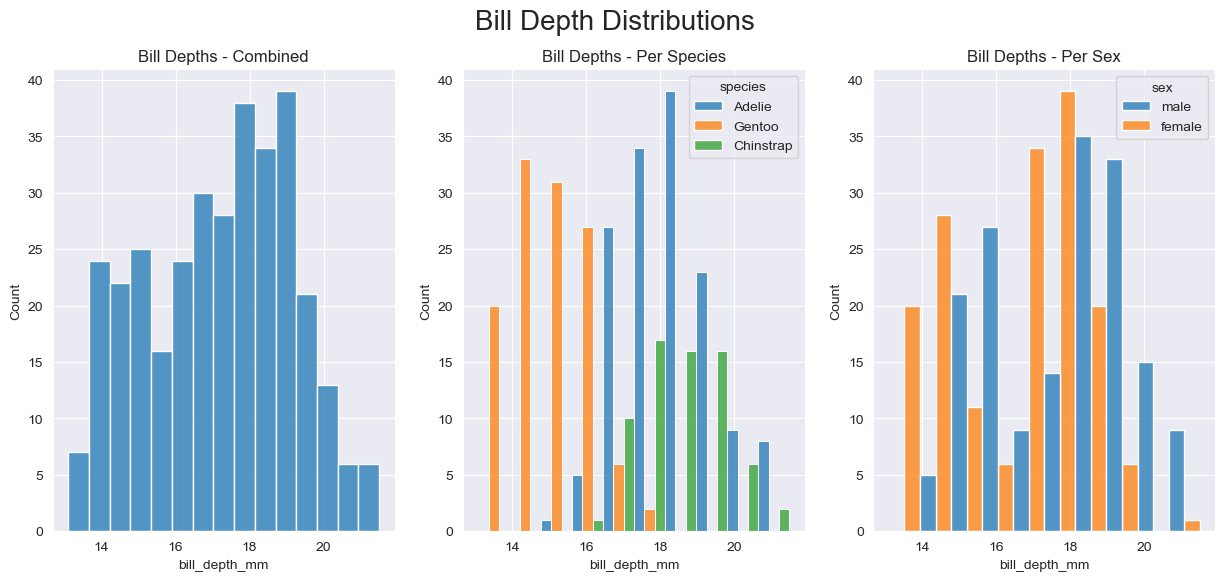

In [61]:
# Setup the structure of the figure and number of axes.
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Bill Depth Distributions', fontsize=20)

# Setup the variables to be plotted, analysed in each axes.
sns.histplot(ax=axes[0], data=peng, x='bill_depth_mm', bins=15,).set(title='Bill Depths - Combined')
sns.histplot(ax=axes[1], data=peng, x='bill_depth_mm', hue='species', multiple='dodge').set(title='Bill Depths - Per Species')
sns.histplot(ax=axes[2], data=peng, x='bill_depth_mm', hue='sex', multiple='dodge').set(title='Bill Depths - Per Sex')

#### ***4.1.4 Flipper Length Distributions***

[Text(0.5, 1.0, 'Flipper Lengths - Per Sex')]

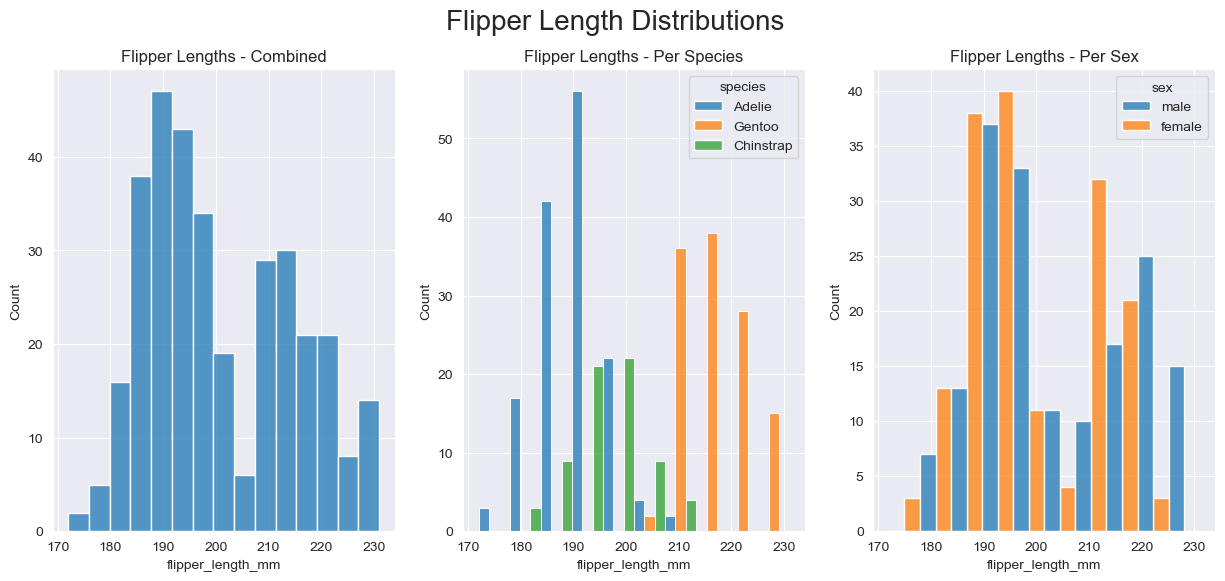

In [60]:
# Setup the structure of the figure and number of axes.
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Flipper Length Distributions', fontsize=20)

# Setup the variables to be plotted, analysed in each axes.
sns.histplot(ax=axes[0], data=peng, x='flipper_length_mm', bins=15,).set(title='Flipper Lengths - Combined')
sns.histplot(ax=axes[1], data=peng, x='flipper_length_mm', hue='species', multiple='dodge').set(title='Flipper Lengths - Per Species')
sns.histplot(ax=axes[2], data=peng, x='flipper_length_mm', hue='sex', multiple='dodge').set(title='Flipper Lengths - Per Sex')

#### ***4.1.5 Add a Kernel Density Estimate Plot***

[Text(0.5, 1.0, 'Flipper Lengths')]

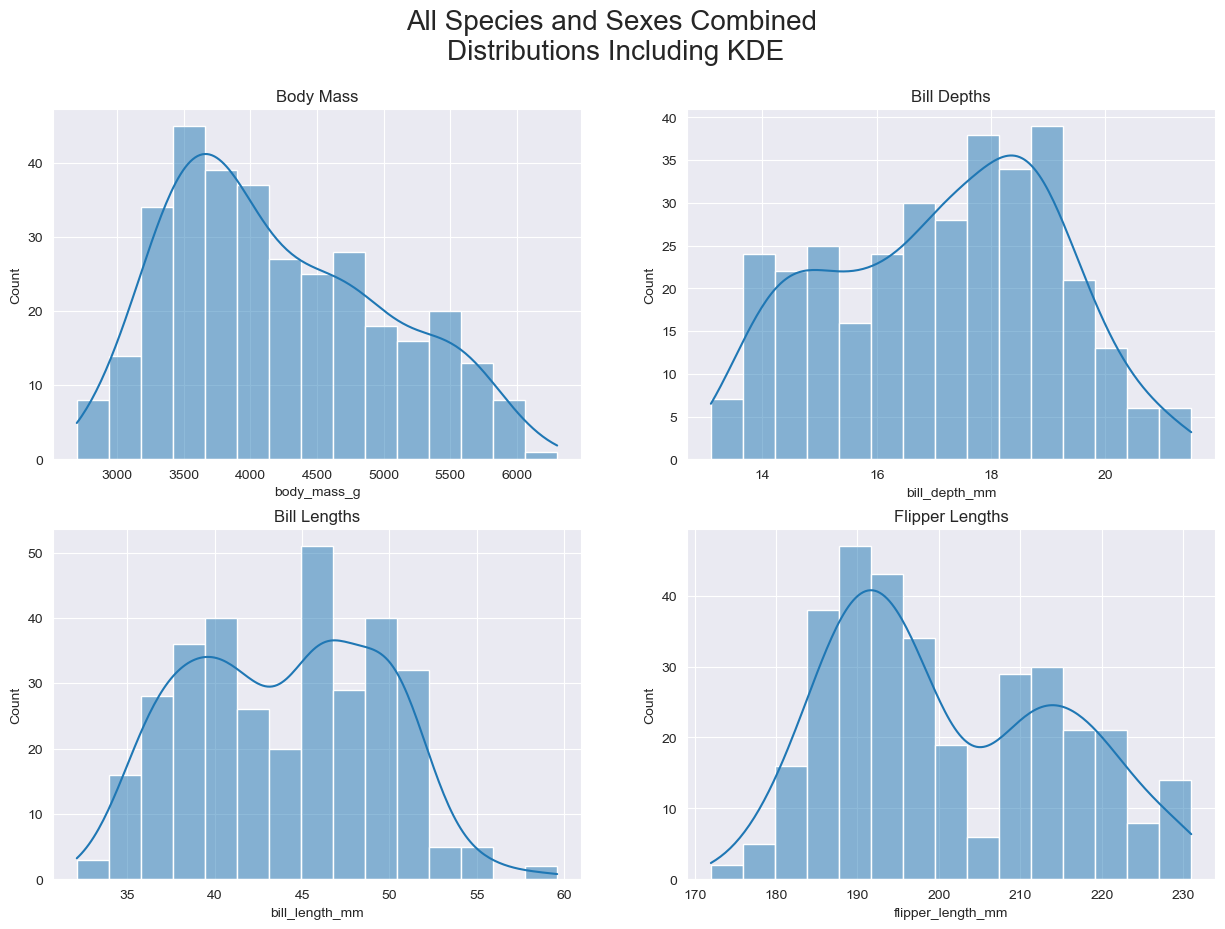

In [65]:
# Setup the structure of the figure and number of axes.
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('All Species and Sexes Combined \nDistributions Including KDE', fontsize=20)

# Setup the variables to be plotted, analysed in each axes.
sns.histplot(ax=axes[0, 0], data=peng, x='body_mass_g', bins=15, kde=True).set(title='Body Mass')
sns.histplot(ax=axes[0, 1], data=peng, x='bill_depth_mm', bins=15, kde=True).set(title='Bill Depths')
sns.histplot(ax=axes[1, 0], data=peng, x='bill_length_mm', bins=15, kde=True).set(title='Bill Lengths')
sns.histplot(ax=axes[1, 1], data=peng, x='flipper_length_mm', bins=15, kde=True).set(title='Flipper Lengths')

[Text(0.5, 1.0, 'Females Bill Depth')]

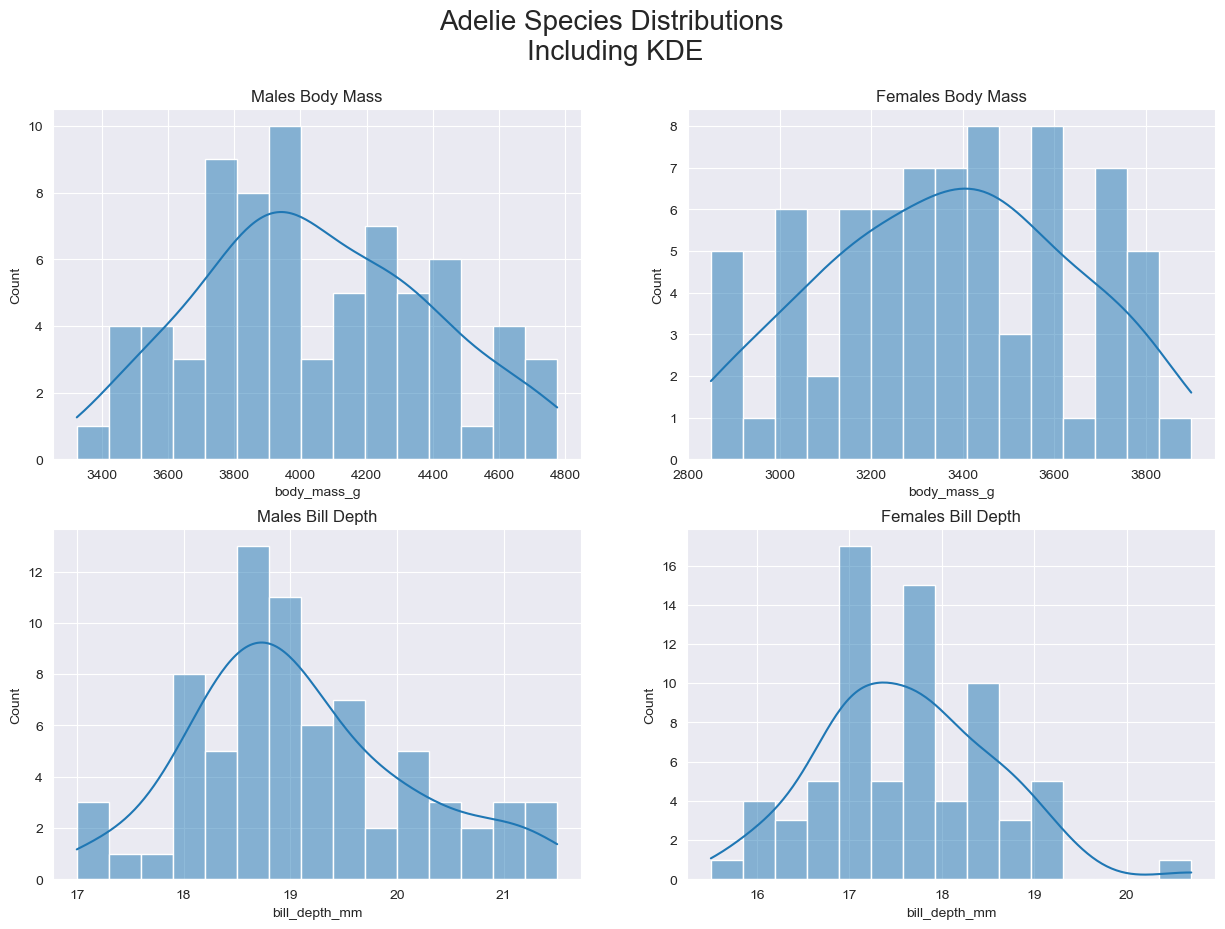

In [59]:
adelie_hist = peng[peng['species'] == 'Adelie']
males_only = adelie_hist.loc[adelie_hist.sex == 'male', :]
females_only = adelie_hist.loc[adelie_hist.sex == 'female', :]

sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Adelie Species Distributions \nIncluding KDE', fontsize=20)

# Setup the variables to be plotted, analysed in each axes.
sns.histplot(ax=axes[0, 0], data=males_only, x='body_mass_g', bins=15, kde=True).set(title='Males Body Mass')
sns.histplot(ax=axes[0, 1], data=females_only, x='body_mass_g', bins=15, kde=True).set(title='Females Body Mass')

sns.histplot(ax=axes[1, 0], data=males_only, x='bill_depth_mm', bins=15, kde=True).set(title='Males Bill Depth')
sns.histplot(ax=axes[1, 1], data=females_only, x='bill_depth_mm', bins=15, kde=True).set(title='Females Bill Depth')

[Text(0.5, 1.0, 'Females Flipper Length')]

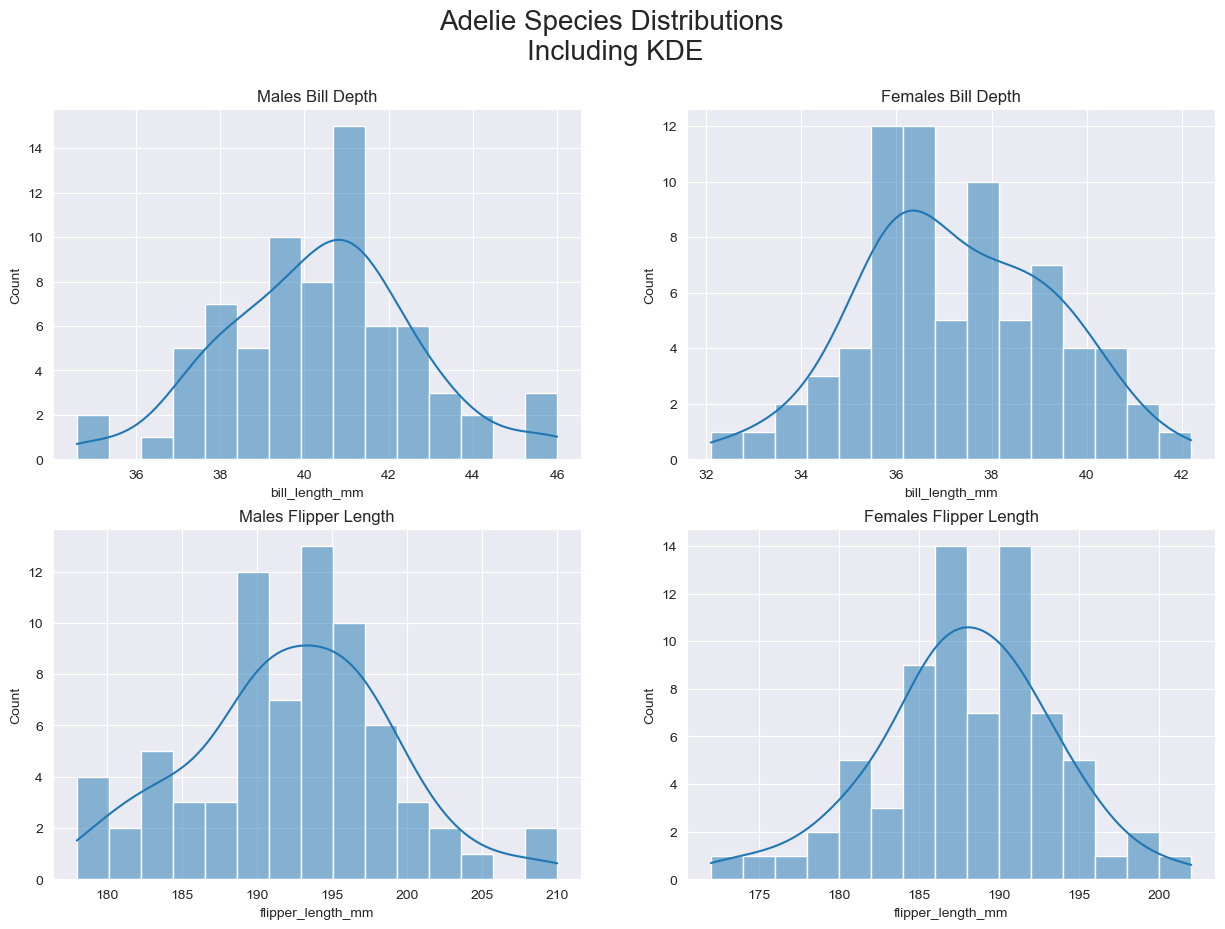

In [58]:
adelie_hist = peng[peng['species'] == 'Adelie']
males_only = adelie_hist.loc[adelie_hist.sex == 'male', :]
females_only = adelie_hist.loc[adelie_hist.sex == 'female', :]

sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Adelie Species Distributions \nIncluding KDE', fontsize=20)

sns.histplot(ax=axes[0, 0], data=males_only, x='bill_length_mm', bins=15, kde=True).set(title='Males Bill Depth')
sns.histplot(ax=axes[0, 1], data=females_only, x='bill_length_mm', bins=15, kde=True).set(title='Females Bill Depth')

sns.histplot(ax=axes[1, 0], data=males_only, x='flipper_length_mm', bins=15, kde=True).set(title='Males Flipper Length')
sns.histplot(ax=axes[1, 1], data=females_only, x='flipper_length_mm', bins=15, kde=True).set(title='Females Flipper Length')

### **4.2 Bar Plots**   
Bar Plots are graphs that utilise rectangular bars to respresent different categories of data. Each bar's length or height corresponds to the value it represents. Seaborn's barplot functionality will be used. More information on Seaborn's barplot can be found [here](https://seaborn.pydata.org/generated/seaborn.barplot.html)

#### ***4.2.1 Average body mass, bill length, bill depth and flipper length per species per sex***

In [20]:
# Create a dataframe with the averages of the four measurement variables
avg2 = peng.groupby(['species', 'sex',])[
                                    ['body_mass_g', 
                                     'bill_length_mm', 
                                     'bill_depth_mm', 
                                     'flipper_length_mm']
                                     ].mean()
round(avg2)

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       3369.0            37.0           18.0   
          male         4043.0            40.0           19.0   
Chinstrap female       3527.0            47.0           18.0   
          male         3939.0            51.0           19.0   
Gentoo    female       4680.0            46.0           14.0   
          male         5485.0            49.0           16.0   

                  flipper_length_mm  
species   sex                        
Adelie    female              188.0  
          male                192.0  
Chinstrap female              192.0  
          male                200.0  
Gentoo    female              213.0  
          male                222.0

#### ***4.2.2 Barplots illustrating average measurement variables per species per sex:***

[Text(0.5, 1.0, 'Average Flipper Length')]

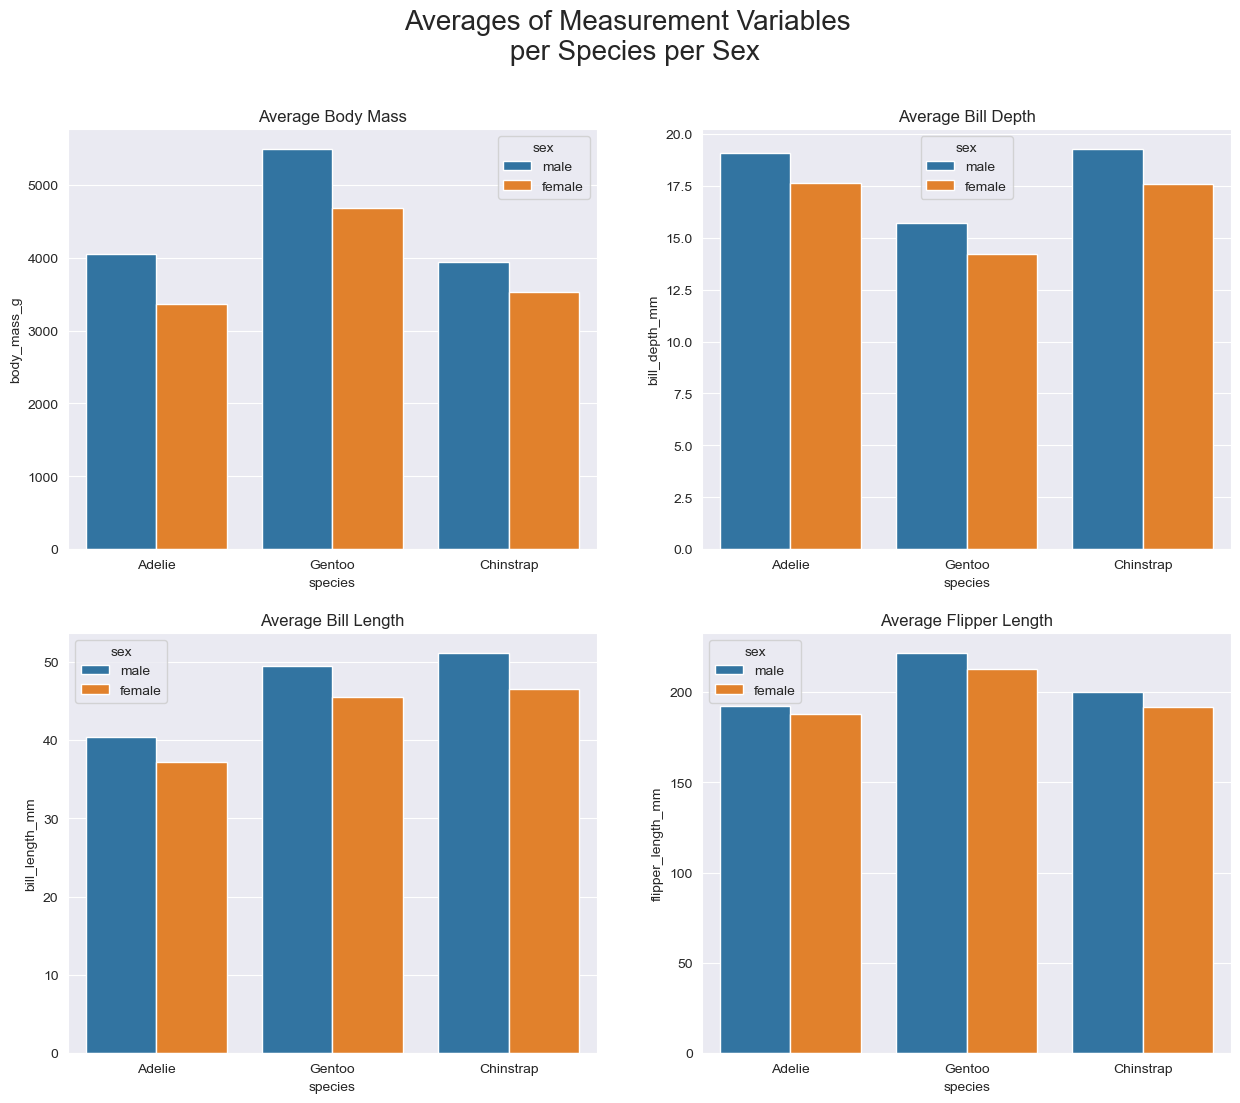

In [21]:
# Assign variables to each of the measurement variables.
body = peng['body_mass_g']
billd = peng['bill_depth_mm']
bill = peng['bill_length_mm']
flip = peng['flipper_length_mm']

# Set up the structure of the figure and number of axes.
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Averages of Measurement Variables \n per Species per Sex', fontsize=20)

# Setup the variable to be plotted, analysed in each axes.
sns.barplot(data=peng, x='species', y=body, hue='sex', ax=axes[0, 0], errorbar=None).set(title='Average Body Mass')
sns.barplot(data=peng, x='species', y=billd, hue='sex', ax=axes[0, 1], errorbar=None).set(title='Average Bill Depth')
sns.barplot(data=peng, x='species', y=bill, hue='sex', ax=axes[1, 0], errorbar=None).set(title='Average Bill Length')
sns.barplot(data=peng, x='species', y=flip, hue='sex', ax=axes[1, 1], errorbar=None).set(title='Average Flipper Length')

#### ***4.2.3 Barplots illustrating the average measurement variables of Adelie species on each island.***

In [66]:
# Create a dataframe for the Adelie species only, with the averages of the four measurement variables. 
adelie_only = peng[peng['species'] == 'Adelie']
adelie_avg = adelie_only.groupby(['island', 'sex'])[
                                    ['body_mass_g', 
                                     'bill_length_mm', 
                                     'bill_depth_mm', 
                                     'flipper_length_mm']
                                     ].mean()
round(adelie_avg)

body_mass_g  bill_length_mm  bill_depth_mm  \
island    sex                                                  
Biscoe    female       3369.0            37.0           18.0   
          male         4050.0            41.0           19.0   
Dream     female       3344.0            37.0           18.0   
          male         4046.0            40.0           19.0   
Torgersen female       3396.0            38.0           18.0   
          male         4035.0            41.0           19.0   

                  flipper_length_mm  
island    sex                        
Biscoe    female              187.0  
          male                190.0  
Dream     female              188.0  
          male                192.0  
Torgersen female              188.0  
          male                195.0

[Text(0.5, 1.0, 'Average Flipper Length')]

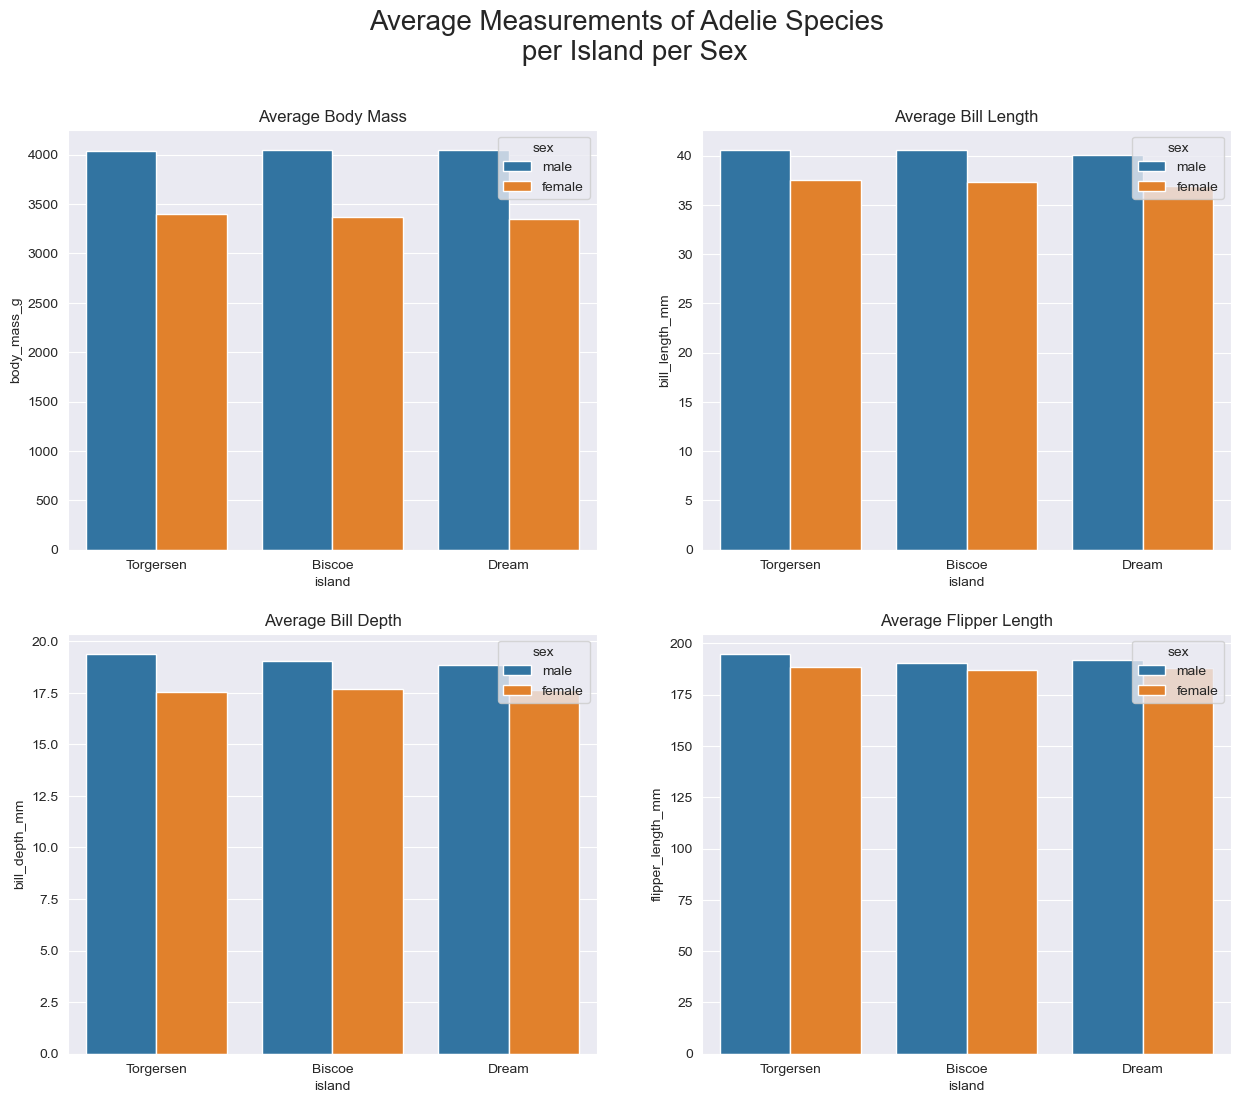

In [ ]:
# Create a dataframe with only Adelie species data
adelie_only = peng[peng['species'] == 'Adelie']

# Set up the structure of the figure and number of axes.
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Average Measurements of Adelie Species \n per Island per Sex', fontsize=20)

# Setup the variable to be plotted and analysed in each axes.
sns.barplot(data=adelie_only, x='island', y='body_mass_g', hue='sex', ax=axes[0, 0], errorbar=None).set(title='Average Body Mass')
sns.barplot(data=adelie_only, x='island', y='bill_length_mm', hue='sex', ax=axes[0, 1], errorbar=None).set(title='Average Bill Length')
sns.barplot(data=adelie_only, x='island', y='bill_depth_mm', hue='sex', ax=axes[1, 0], errorbar=None).set(title='Average Bill Depth')
sns.barplot(data=adelie_only, x='island', y='flipper_length_mm', hue='sex', ax=axes[1, 1], errorbar=None).set(title='Average Flipper Length')

### **4.3 Summary of Visualization Analysis**

* Taking the averages of the measurement variables:   
    * Body Mass has large standard deviations across the board, which tells us there are lots of values far from the mean.    
    * For bill length, bill depth, and flipper length, the standard deviations are small, telling us most of the measurements are close to the mean.
* In all categories, on average the male of each species is larger than the female.

## **5. Correlation Analysis**

***

### **5.1 What is Correlation Analysis?**

Correlation measures the linear association between two variables. More information on correlation can be found [here](https://en.wikipedia.org/wiki/Correlation)  

The correlation coefficient has a value between -1 and 1 and it tells the strength and direction of a relationship between variables:   
- -1 indicates a perfectly negative linear correlation.   
-  0 indicates no linear correlation.   
- 1 indicates a perfectly positive linear correlation.    

There are four general categories under which the strength of a relationship between two variables is classified. They are: 
- A correlation coefficient of 0 to 0.25 signifies no relationship.   
- Between 0.25 and 0.5 signifies a weak relationship.   
- Between 0.5 and 0.75 signifies a moderate relationship. 
- Between 0.75 and 1 signifies a strong relationship.    
[Source](https://www.statology.org/what-is-a-strong-correlation/)

### **5.2 Plotting Correlations**  

The Seaborn pairplot functionality can be used to plot the correlations between all the measurement variables on one figure.

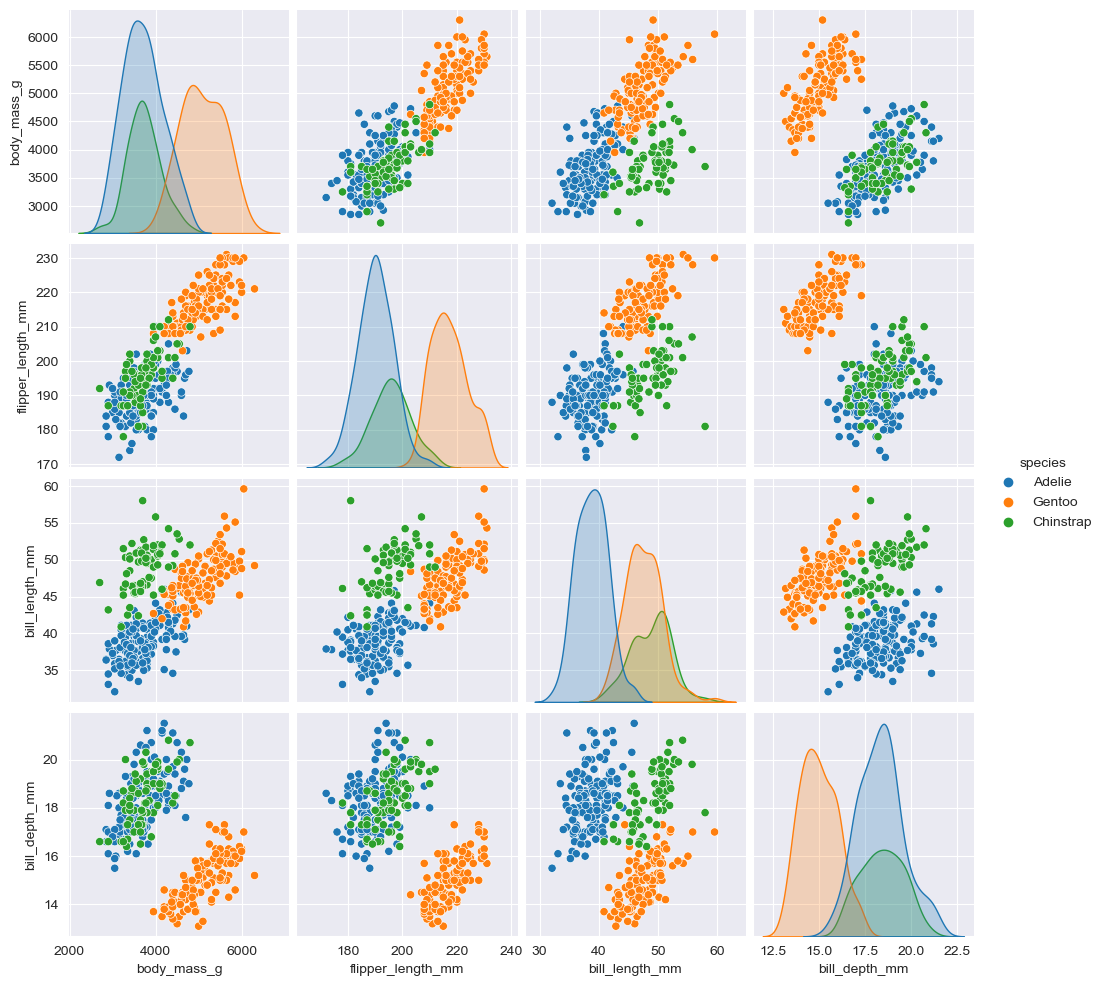

In [ ]:
# Use Seaborn pairplot to plot the correlations of all four measurement variables on one figure.
peng2 = peng[
            ['species', 
             'body_mass_g', 
             'flipper_length_mm', 
             'bill_length_mm', 
             'bill_depth_mm']
             ]
pairplot(peng2, hue='species')

#### ***5.2.1 What does the corellation plot show?***

- The correlations generated by pairplot above illustrate the relationship between the four measurement variables.   
- For example, taking flipper length v body mass, it can be seen that in general, the larger the flipper length, the larger the body mass. This is an example of a positive correlation.   
- However, further analysis is required to provide more details in relation to the strength of this correlation. 
- The first way to provide more detail is by adding a line of best fit.

### **5.3 Plotting a Line of Best Fit**   
   
- A line of best fit is a straight line drawn through a set of data points on a scatter plot that helps illustrate the relationship between those data points. Further details on lines of best fit can be found [here](https://www.geeksforgeeks.org/line-of-best-fit/).   
- For the penguins dataset, Seaborn can again be used to plot the line of best fit between all the variables.   

#### ***5.3.1 Apply a line of best fit to two of the measurement variables***

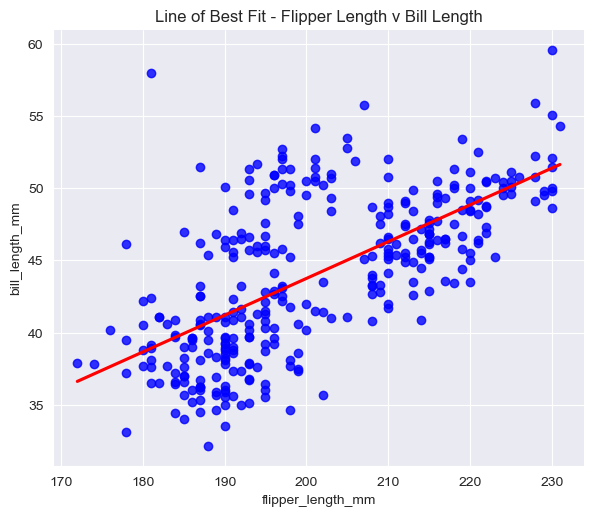

In [ ]:
# Use Seaborn to plot lines of best fit between only two variables on the pairplot
sns.pairplot(peng, 
            # Set the y-axis variable as bill length
             y_vars=['bill_length_mm'], 
             # Set the x-axis variable as flipper length
             x_vars=['flipper_length_mm'], 
             # Seaborn regplot
             kind='reg', 
             height=5, 
             # Sets the ratio of the width to the height
             aspect=1.2,
             # Formats the colours and size of the line and scatter plot data points
             plot_kws={'ci' : None, 'color' : 'red',
                       'scatter_kws' : {'color' : 'blue'}}
             ).set(title='Line of Best Fit - Flipper Length v Bill Length')

#### ***5.3.2 Apply lines of best fit to all axes in the correlation figure***

Text(0.5, 1.03, 'Lines of Best Fit')

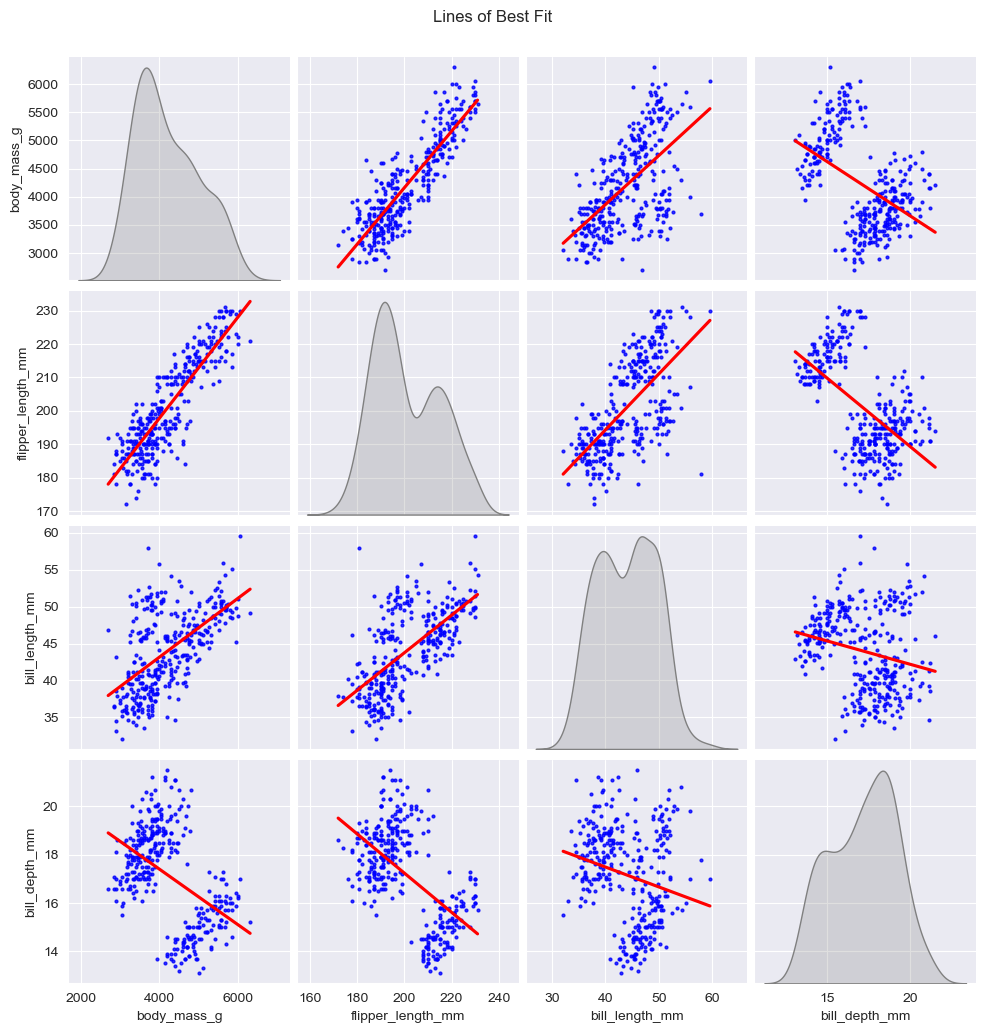

In [ ]:
# Use Seaborn to plot lines of best fit between variables on the pairplot
peng5 = peng[
            ['species', 
             'body_mass_g', 
             'flipper_length_mm', 
             'bill_length_mm', 
             'bill_depth_mm']
             ]
sns.pairplot(peng5, 
            # reg is short for regplot and is used to apply the lines of best fit
            kind='reg', 
            # Sets kernel density estimates in the diagonals instead of histograms
            diag_kind='kde',
            height=2.5,
            # Sets the ratio of the width to the height
            aspect=1,
            # Formats the colours and size of the line and scatter plot data points
            plot_kws={'ci' : None, 'color' : 'red', 
                      'scatter_kws' : {'color' : 'blue', 's' : 4}
                      },
            # Sets the colour of the kernel density estimates in the diagonals
            diag_kws={'color' : 'grey'}
            ).fig.suptitle('Lines of Best Fit', y=1.03)

#### ***5.3.3 What do the lines of best fit show?***

- In the case of flipper length v body mass plot in 5.3.1, it clearly shows an upward slope, i.e. a positive correlation.
- The correlation pairplot generated in 5.2 now has lines of best fit placed for each of the pairs of variables (colours have been changed to make the line and its direction clear).
- Taking bill depth v bill length as an example, it is more of a horizontal line, suggesting there is no significant correlation between the two.
- The next step is to get a numerical indication of the strength of the corellations. That is done by calculating correlation coefficients.

### **5.4 Calculate Correlation Coefficients**  

- The correlation coefficient is the measure between -1 and 1 that describes the direction and strength of a linear relationship between two variables.
- There are various ways to calculate the figure using Python.
- Below is how the figure is generated using numpy.corrcoef. More information on that can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

In [ ]:
# Calculate the correlation coefficient figure between flipper length and bill length
np.corrcoef(flipper, bill)

array([[1.        , 0.65309564],
       [0.65309564, 1.        ]])

- As per the classifications of the strength of correlations in section 5.1 above, a correlation coefficient of 0.65 signifies a positive, moderate relationship between flipper length and bill length.
- The correlation coefficient can also be calculated for all the other correlations using Pandas corr() method. This generates a correlation matrix dataframe. More information [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [ ]:
# Create a dataframe with only the four measurement variables
peng6 = peng[
            ['body_mass_g', 
             'flipper_length_mm', 
             'bill_length_mm', 
             'bill_depth_mm']
             ]

# Apply the Pandas corr() method to generate corellation matrix dataframe 
corr = peng6.corr()
# Display values
corr

,body_mass_g,flipper_length_mm,bill_length_mm,bill_depth_mm
body_mass_g,1.000000,0.872979,0.589451,-0.472016
flipper_length_mm,0.872979,1.000000,0.653096,-0.577792
bill_length_mm,0.589451,0.653096,1.000000,-0.228626
bill_depth_mm,-0.472016,-0.577792,-0.228626,1.000000


- The above correlation matrix can be made even clearer by generating a correlation heatmap using Seaborn.

### **5.5 Correlation Heatmap**

#### ***5.5.1 What is a Correlation Heatmap?***
- A correlation heatmap is a visual representation of the correlation matrix.
- Seaborn's heatmap() function can be used to generate the heatmap for the penguins correlations. More information on Seaborn's heatmap function [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).
- This [webpage](https://www.geeksforgeeks.org/colormaps-in-seaborn-heatmaps/) provides further details on the color map options.

<Axes: >

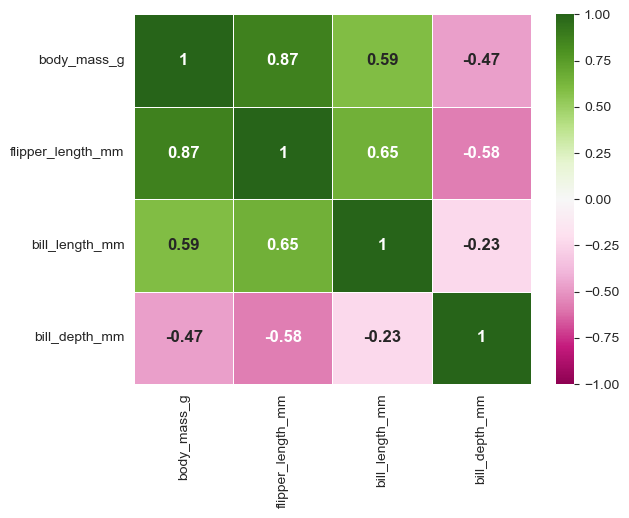

In [ ]:
# Generate correlation heatmap from correlation matrix in 5.4 above. 
sns.heatmap(corr, 
            # Set minimum value to minus 1
            vmin=-1,
            # Set maximum value to 1 
            vmax=1, 
            # Assign colours to the heatmap
            cmap='PiYG',
            # Assign values to each square in the heatmap 
            annot=True,
            # Format how values appear in each square of the heatmap
            annot_kws={'fontsize' : 12, 
                       'fontweight' : 'bold'
                       },
            # Create a white line between each square in the heatmap
            linewidth=0.5,
            )

#### ***5.5.2 What does the heatmap show?***   
- The heatmap has been colour coded to show positive correlations in green and negative correlations in red.   
- The heatmap has also been structured to display the rounded correlation coefficient number in each square.
- In summary, body mass, flipper length and bill length all have positive correlations, with body mass to flipper length being the strongest relationship at 0.87.   
- However, it is interesting to note that bill depth has a negative correlation agains all the other three variables.

***
### End